# Shell Sort and the choice of stride length $k$
Group member: 
- Congxin (David) Xu; cx2rx
- Yusheng Jiang; yj3tp
- Jae Yoon Sung; js2yp
- Hyunglok Kim; hk5kp
- Diyu Zheng; dz2fc

## 1. General Description

Shell sort is an algorithm that **first sorts the elements far apart** from each other and successively **reduces the interval** between the elements to be sorted. Donald Shell published the first version of this sort in 1959. It is a generalized version of *insertion sort*.

In shell sort, elements at a specific **interval** are sorted. The interval between the elements is gradually decreased based on the sequence used. The performance of the shell sort depends on the type of sequence used for a given input array.

Shell sort is **not stable** and it might change the relative order of elements with equal values.






## 2. Demonstration


### Several ways of choosing stride sequence:

### Shell's original sequence: N/2 , N/4 , …, 1

### Knuth's increments: 1, 4, 13, …, (3k – 1) / 2

### Sedgewick's increments: 1, 8, 23, 77, 281, 1073, 4193, 16577...4j+1+ 3·2j+ 1

### Hibbard's increments: 1, 3, 7, 15, 31, 63, 127, 255, 511…

### Papernov & Stasevich increment: 1, 3, 5, 9, 17, 33, 65,...

### Pratt: 1, 2, 3, 4, 6, 9, 8, 12, 18, 27, 16, 24, 36, 54, 81....


### The general process of Shell Sort algorithm

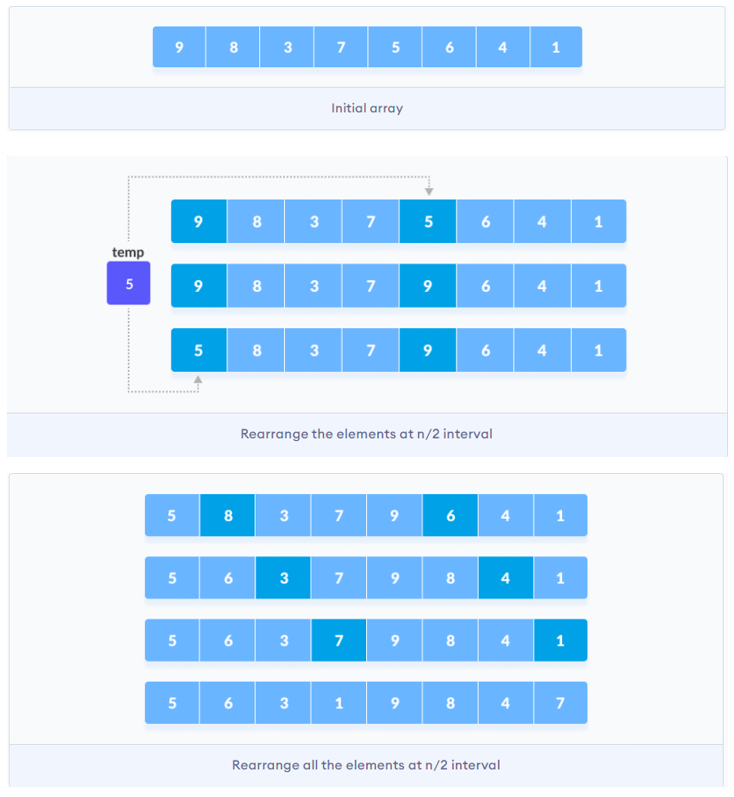

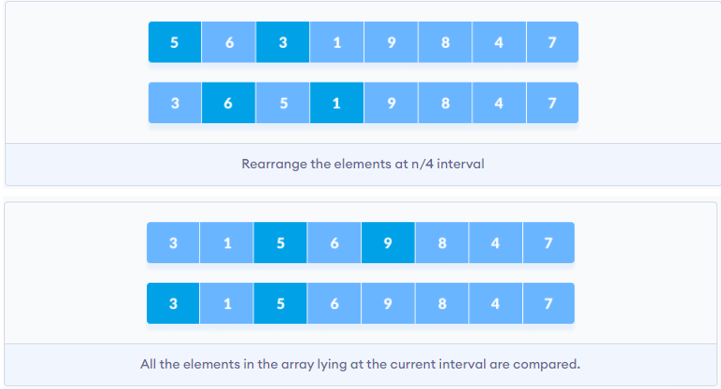

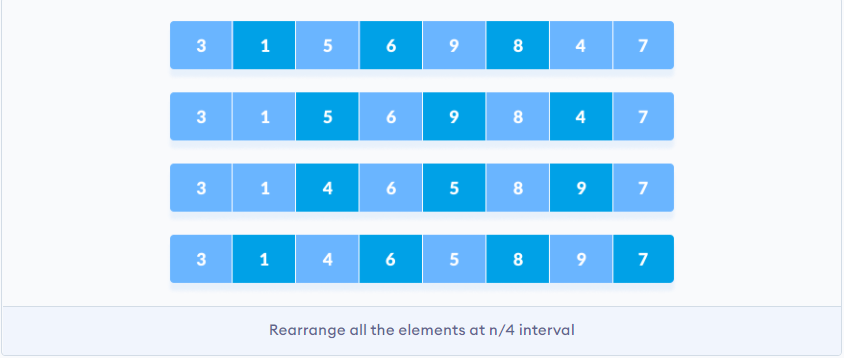

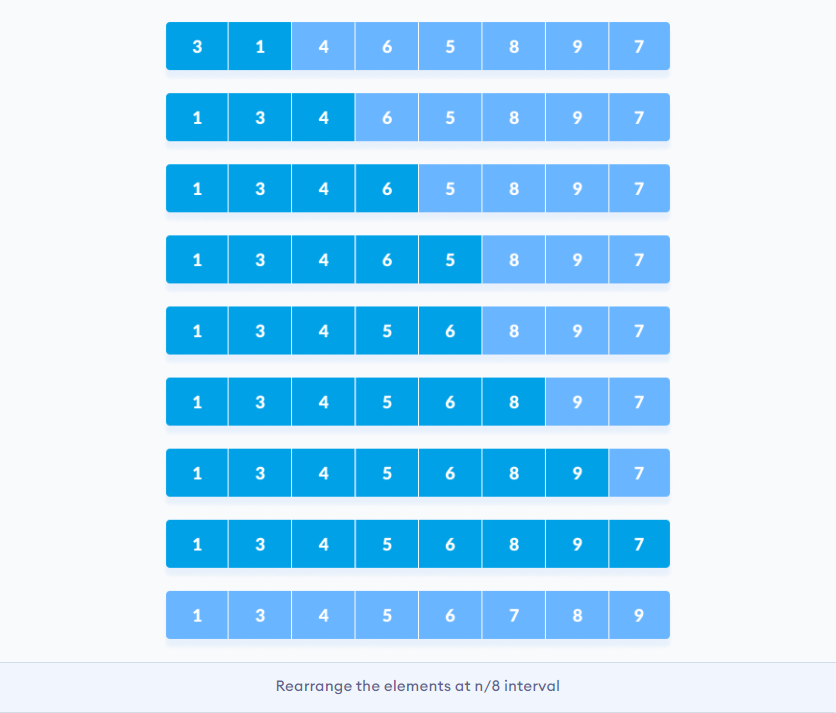

## 3. Code Part


In [ ]:
def shellSort(arr):
    n = len(arr) # the length of the array
    stride = n // 2 # stride for the beginning 
    while stride > 0: 
        for i in range(stride, n): # traverse the whole array with different starting point and same stride
            temp = arr[i]
            j = i - stride
            while j >= 0 and arr[j] > temp: # use insertion sort to the elements with same distance in the array
                arr[j + stride] = arr[j]
                j = j - stride
                print(arr) 
            arr[j + stride] = temp # after each traverse, we put the current element in the right place
        print("*****************************")
        print(arr)
        stride = stride // 2  # shrink stride every time by half
    return # inplace sorting

test_arr = [9, 8, 3, 7, 5, 6, 4, 1]
shellSort(test_arr)


[9, 8, 3, 7, 9, 6, 4, 1]
[5, 8, 3, 7, 9, 8, 4, 1]
[5, 6, 3, 7, 9, 8, 4, 7]
*****************************
[5, 6, 3, 1, 9, 8, 4, 7]
[5, 6, 5, 1, 9, 8, 4, 7]
[3, 6, 5, 6, 9, 8, 4, 7]
[3, 1, 5, 6, 9, 8, 9, 7]
[3, 1, 5, 6, 5, 8, 9, 7]
[3, 1, 4, 6, 5, 8, 9, 8]
*****************************
[3, 1, 4, 6, 5, 7, 9, 8]
[3, 3, 4, 6, 5, 7, 9, 8]
[1, 3, 4, 6, 6, 7, 9, 8]
[1, 3, 4, 5, 6, 7, 9, 9]
*****************************
[1, 3, 4, 5, 6, 7, 8, 9]


## 4.Advantages? Disadvantages?

- **Advantages**

  - Efficient for finite number of elements

  - 5 times faster than bubble sort

- **Disadvantages**

  - Complex algorithm

  - Not as efficient as the merge, quick, and heap sorts

  - Limited with small size arrays


---
## 5.Complexity
Advantages  - It depends on how we select the gap and interval.
  - Its running time is a function of increments (Knuth, 2013)

- **Dependency**
  - It depends on the interval chosen
  - It differs for different increment (*h*) sequences chosen

- **`Worst Case Complexity`**: less than or equal to $O(n^2)$

- **`Average Case Complexity`**: $O(nlog(n))$ or $O(n^{5/3})$
  - The best choice of *h* is known to be ~ 1.72$n^{1/3}$
  - With this chocie of *h*, average running time is proportional to $n^{5/3}$ (Knuth, 2013)

- **`Best Case Complexity`**: $O(nlog(n))$


|-Worst Case- |-Average Case-|-Best Case-|
|:--:         |:--:         |:--:     |
|$O(n^2)$ or less   |$O(n log (n))$ or $O(n^{5/3})$ |$O(n log(n))$ |


---

## 6. When to use Shell Sort?
- Shell Sort could be used **when calling a stack is overhead** since it can be implemented using little code and does not use the call stack. 
- Shell sort could serve as a sub-algorithm of introspective sort, to sort short subarrays and to prevent a slowdown when the **recursion depth exceeds a give limit**.
-Insertion sort does not perform well when **the close elements are far apart**. Shell sort helps in reducing the distance between the close elements. Thus, there will be less number of swappings to be performed. 


## 7. Compared with *Insertion Sort*
- Shell Sort is considered as a generalized version of Insertion Sort 
- Insertion Sort places elements one at a time while Shell sort swap two values when needed
- Insertion is usually used with small arrays and Shell sort is used when close values are far part
- Complexity

|               |-Worst Case- |-Average Case-|-Best Case-|
|:--:           |:--:         |:--:         |:--:     |
|Shell Sort     |$O(n^2)$     |$O(n log n)$ |$O(n log n)$ |
|Insertion Sort |$O(n^2)$     |$O(n^2)$     |$O(n^2)$ |

In [ ]:
def shellSort(arr):
    n = len(arr) # the length of the array
    stride = n // 2 # stride for the beginning 
    while stride > 0: # log(n)
        for i in range(stride, n): # traverse the whole array with different starting point and same stride
            temp = arr[i]
            j = i - stride
            while j >= 0 and arr[j] > temp: # use insertion sort to the elements with same distance in the array
                arr[j + stride] = arr[j]
                j = j - stride
            arr[j + stride] = temp
        stride = stride // 2  # shrink stride every time by half
    return arr  # inplace sorting

def insertionSort(arr): 
  
    # Traverse through 1 to len(arr) 
    for i in range(1, len(arr)): 
  
        key = arr[i] 
  
        # Move elements of arr[0..i-1], that are 
        # greater than key, to one position ahead 
        # of their current position 
        j = i-1
        while j >= 0 and key < arr[j] : 
                arr[j + 1] = arr[j] 
                j -= 1
        arr[j + 1] = key 

# playing with the code
import random
import time

def run_trials(f, n, numTrials):
    """ Run numTrials of f with list of size n.  Return the average time taken. """
    total_time = 0
    for _ in range(numTrials):
        array = gen_trial(n)
        start = time.time()
        f(array)
        total_time += time.time() - start
    return total_time / numTrials

def gen(n):
    l = list(map(lambda x: random.randint(1, 2*n), range(n)))
    return l


def gen_trial(n):
    array = gen(n)
    # pick a value in the array
    # we can get an outlier for cases where A[n] is picked.
    return (array)

n = 1
durations1 = []
print('Shell sort for unsorted data') 
for i in range(6,12):
    n = 2 ** i
    for i in range(1):
        duration1 = run_trials(shellSort, n, 20)
        durations1.append([n, duration1])
        print(f"n = {n:-30} - duration: {duration1}")

print('Insertion sort for unsorted data') 
durations2 = []
for i in range(6,12):
    n = 2 ** i
    for i in range(1):
        duration2 = run_trials(insertionSort, n, 20)
        durations2.append([n, duration2])
        print(f"n = {n:-30} - duration: {duration2}")
            
 

Shell sort for unsorted data
n =                             64 - duration: 7.264614105224609e-05
n =                            128 - duration: 0.00019199848175048827
n =                            256 - duration: 0.0004892349243164062
n =                            512 - duration: 0.0016669750213623047
n =                           1024 - duration: 0.0038270831108093263
n =                           2048 - duration: 0.010673427581787109
Insertion sort for unsorted data
n =                             64 - duration: 0.0001238107681274414
n =                            128 - duration: 0.0005431413650512695
n =                            256 - duration: 0.0019558072090148926
n =                            512 - duration: 0.008076083660125733
n =                           1024 - duration: 0.034859633445739745
n =                           2048 - duration: 0.14552923440933227


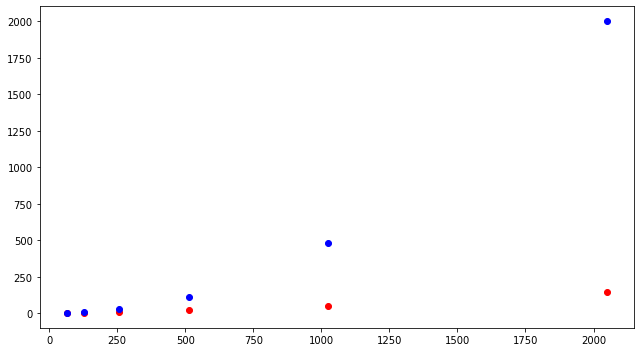

In [ ]:
import matplotlib.pyplot as plt
import math
scale = durations1[0][1]
fig, ax = plt.subplots(1,1,figsize=(9,5))

x = [d[0] for d in durations1]
y = [d[1]/scale for d in durations1]
plt.scatter(x, y,color='red',)

x2 = [d[0] for d in durations2]
y2 = [d[1]/scale for d in durations2]
plt.scatter(x2, y2,color='blue')

plt.tight_layout()
plt.show()


***Reference***

Knuth, D. E. (2013). Art of Computer Programming, Volume 4, Fascicle 4, The: Generating All Trees--History of Combinatorial Generation. Addison-Wesley Professional.
### https://www.programiz.com/dsa/shell-sort
### https://iq.opengenus.org/shell-sort/#implementations

